# Mapping Japan

このラボでは…


In [69]:
import geopandas as gpd

## Part 1 - GIS Dataのダウンロード
まずは「区」のポリゴンデータをダウンロードします。

https://nlftp.mlit.go.jp/ksj/

In [82]:
chiba_ku = gpd.read_file('data/N03-20230101_12_GML/N03-23_12_230101.geojson')

<AxesSubplot: >

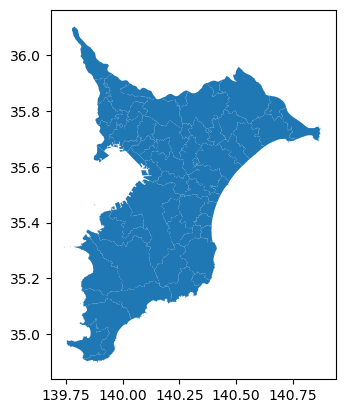

In [83]:
chiba_ku.plot()

In [84]:
chiba_ku.head()

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,千葉県,NaN,千葉市,千葉市中央区,12101,"POLYGON ((140.08318 35.58821, 140.08333 35.588..."
1,千葉県,NaN,千葉市,千葉市中央区,12101,"POLYGON ((140.12789 35.62462, 140.12797 35.624..."
2,千葉県,NaN,千葉市,千葉市花見川区,12102,"POLYGON ((140.11733 35.70958, 140.11755 35.709..."
3,千葉県,NaN,千葉市,千葉市稲毛区,12103,"POLYGON ((140.13703 35.67385, 140.13697 35.673..."
4,千葉県,NaN,千葉市,千葉市若葉区,12104,"POLYGON ((140.15469 35.65408, 140.15471 35.654..."


In [94]:
chiba_ku.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   2265 non-null   object  
 1   N03_002   0 non-null      float64 
 2   N03_003   86 non-null     object  
 3   N03_004   2265 non-null   object  
 4   KEY_CODE  2265 non-null   object  
 5   geometry  2265 non-null   geometry
dtypes: float64(1), geometry(1), object(4)
memory usage: 106.3+ KB


## Part 2 - 国勢調査データをダウンロード

https://www.e-stat.go.jp/gis/statmap-search?type=1

次はPopulationデータをダウンロード

https://www.e-stat.go.jp/gis/statmap-search?page=1&type=1&toukeiCode=00200521


In [95]:
chiba_pop = pd.read_csv('data/chiba.csv')

In [96]:
chiba_pop.head()

,KEY_CODE,HYOSYO,CITYNAME,NAME,人口総数,男,女,世帯総数
0,12101,1,千葉市中央区,NaN,211736,105766,105970,109336
1,121010010,2,千葉市中央区,青葉町,2671,1238,1433,1042
2,121010020,2,千葉市中央区,赤井町,1811,885,926,594
3,121010030,2,千葉市中央区,旭町,1054,520,534,563
4,121010040,2,千葉市中央区,市場町,517,271,246,326


In [97]:
chiba_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6767 entries, 0 to 6766
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   KEY_CODE  6767 non-null   int64 
 1   HYOSYO    6767 non-null   int64 
 2   CITYNAME  6767 non-null   object
 3   NAME      6706 non-null   object
 4   人口総数      6767 non-null   object
 5   男         6767 non-null   object
 6   女         6767 non-null   object
 7   世帯総数      6767 non-null   object
dtypes: int64(2), object(6)
memory usage: 423.1+ KB


## Part 3 - GISデータと国勢調査データを`Merge`する


Mergeするには次のチェックポイントを確認：

1. mergeするfieldを決める
1. field names が同じであることを確認。違う場合は同じにする。
1. field達が同じ data type であることを確認

この二つがオッケーであれば merge function を使って実行 

### 3-1 Mergeするfieldを決めよう

- `chiba_ku` → `N03_007`
- `chiba_pop` → `KEY_CODE`

### 3-2 field names を揃えよう

残念ながらmergeするfieldnameが違う😩

`rename` functionを使って一致するようにしましょう。

この場合は `KEY_CODE` に一致しよう。

In [91]:
# rename
chiba_ku.rename(columns={'N03_007':'KEY_CODE'},inplace=True)

In [92]:
chiba_ku

,N03_001,N03_002,N03_003,N03_004,KEY_CODE,geometry
0,千葉県,NaN,千葉市,千葉市中央区,12101,"POLYGON ((140.08318 35.58821, 140.08333 35.588..."
1,千葉県,NaN,千葉市,千葉市中央区,12101,"POLYGON ((140.12789 35.62462, 140.12797 35.624..."
2,千葉県,NaN,千葉市,千葉市花見川区,12102,"POLYGON ((140.11733 35.70958, 140.11755 35.709..."
3,千葉県,NaN,千葉市,千葉市稲毛区,12103,"POLYGON ((140.13703 35.67385, 140.13697 35.673..."
4,千葉県,NaN,千葉市,千葉市若葉区,12104,"POLYGON ((140.15469 35.65408, 140.15471 35.654..."
...,...,...,...,...,...,...
2260,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.82032 35.15010, 139.82028 35.150..."
2261,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.82142 35.15018, 139.82139 35.150..."
2262,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.82567 35.15224, 139.82554 35.152..."
2263,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.85503 35.16407, 139.85517 35.164..."


### Merge する　field の data typeが同じかどうかを確認

Oh now! datatypeも違う😩

- `chiba_ku['KEY_CODE]` → OBJECT
- `chiba_pop['KEY_CODE']` → int64

では両方 int にしましょう

In [107]:
chiba_ku['KEY_CODE'] = chiba_ku['KEY_CODE'].astype(int)

In [99]:
chiba_ku.info

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   2265 non-null   object  
 1   N03_002   0 non-null      float64 
 2   N03_003   86 non-null     object  
 3   N03_004   2265 non-null   object  
 4   KEY_CODE  2265 non-null   int64   
 5   geometry  2265 non-null   geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 106.3+ KB


In [100]:
chiba_ku_pop = chiba_ku.merge(chiba_pop,on='KEY_CODE')

In [101]:
chiba_ku_pop

,N03_001,N03_002,N03_003,N03_004,KEY_CODE,geometry,HYOSYO,CITYNAME,NAME,人口総数,男,女,世帯総数
0,千葉県,NaN,千葉市,千葉市中央区,12101,"POLYGON ((140.08318 35.58821, 140.08333 35.588...",1,千葉市中央区,NaN,211736,105766,105970,109336
1,千葉県,NaN,千葉市,千葉市中央区,12101,"POLYGON ((140.12789 35.62462, 140.12797 35.624...",1,千葉市中央区,NaN,211736,105766,105970,109336
2,千葉県,NaN,千葉市,千葉市花見川区,12102,"POLYGON ((140.11733 35.70958, 140.11755 35.709...",1,千葉市花見川区,NaN,177328,87280,90048,81123
3,千葉県,NaN,千葉市,千葉市稲毛区,12103,"POLYGON ((140.13703 35.67385, 140.13697 35.673...",1,千葉市稲毛区,NaN,160582,80345,80237,74796
4,千葉県,NaN,千葉市,千葉市若葉区,12104,"POLYGON ((140.15469 35.65408, 140.15471 35.654...",1,千葉市若葉区,NaN,146940,73000,73940,64840
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.82093 35.14996, 139.82089 35.149...",1,鋸南町,NaN,6993,3356,3637,3034
2260,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.82032 35.15010, 139.82028 35.150...",1,鋸南町,NaN,6993,3356,3637,3034
2261,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.82142 35.15018, 139.82139 35.150...",1,鋸南町,NaN,6993,3356,3637,3034
2262,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.82567 35.15224, 139.82554 35.152...",1,鋸南町,NaN,6993,3356,3637,3034


## Part 4 - Choropleth map を作ろう

いよいよマップの時間！

Choropleth map を作る手順は：

1. どのフィールドをマップするかを決める
1. そのフィールドが numeric であることを確認
1. マップを作る！

### 4-1 フィールドを決める

まずは人口マップを作りたいので `人口総数` フィールドを使おう。

### 4-2 フィールドが numeric であることを確認

In [114]:
chiba_ku_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2264 entries, 0 to 2263
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   2264 non-null   object  
 1   N03_002   0 non-null      float64 
 2   N03_003   86 non-null     object  
 3   N03_004   2264 non-null   object  
 4   KEY_CODE  2264 non-null   int64   
 5   geometry  2264 non-null   geometry
 6   HYOSYO    2264 non-null   int64   
 7   CITYNAME  2264 non-null   object  
 8   NAME      0 non-null      object  
 9   人口総数      2264 non-null   int64   
 10  男         2264 non-null   object  
 11  女         2264 non-null   object  
 12  世帯総数      2264 non-null   object  
dtypes: float64(1), geometry(1), int64(3), object(8)
memory usage: 247.6+ KB


Oh no😩! やっぱり int ではなく object だった。

Let's fix that!

In [108]:
chiba_ku_pop['人口総数'] = chiba_ku_pop['人口総数'].astype(int)

In [115]:
# check
chiba_ku_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2264 entries, 0 to 2263
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   2264 non-null   object  
 1   N03_002   0 non-null      float64 
 2   N03_003   86 non-null     object  
 3   N03_004   2264 non-null   object  
 4   KEY_CODE  2264 non-null   int64   
 5   geometry  2264 non-null   geometry
 6   HYOSYO    2264 non-null   int64   
 7   CITYNAME  2264 non-null   object  
 8   NAME      0 non-null      object  
 9   人口総数      2264 non-null   int64   
 10  男         2264 non-null   object  
 11  女         2264 non-null   object  
 12  世帯総数      2264 non-null   object  
dtypes: float64(1), geometry(1), int64(3), object(8)
memory usage: 247.6+ KB


### 4-3 Let's map!

<AxesSubplot: >

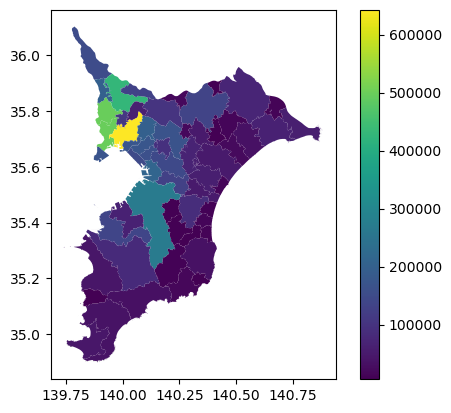

In [111]:
chiba_ku_pop.plot(column='人口総数',legend=True)